In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

## Stable baselines implementation

In [9]:
pickle_path = "../rates_delay_loss_sb.pickle"
l_rate = pd.read_pickle(pickle_path)

time_step = 200

./traces/WIRED_900kbps.json
./traces/WIRED_900kbps.json
./traces/WIRED_900kbps.json
./traces/WIRED_900kbps.json
./traces/WIRED_900kbps.json
./traces/WIRED_900kbps.json


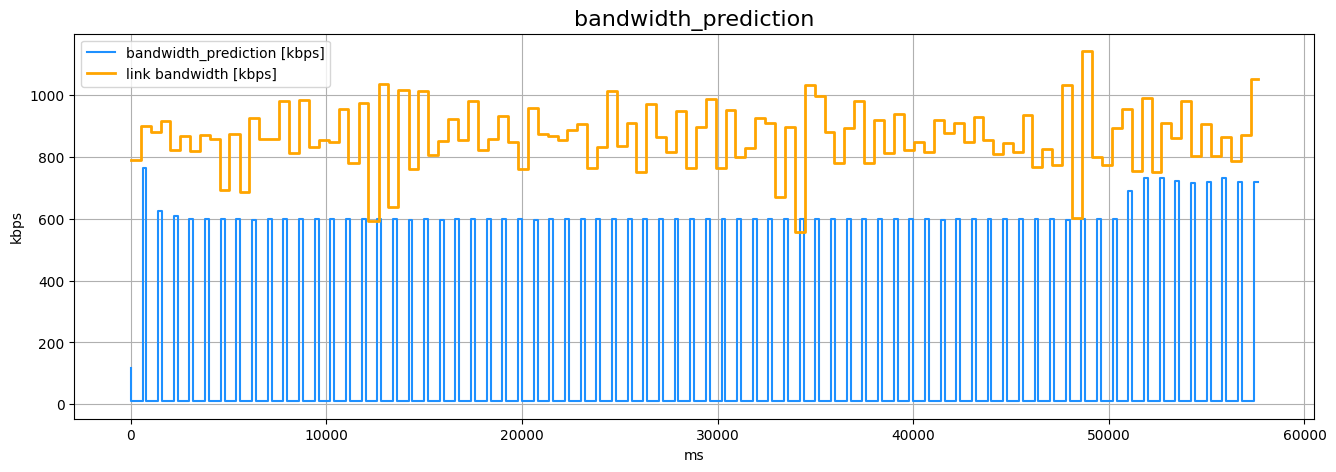

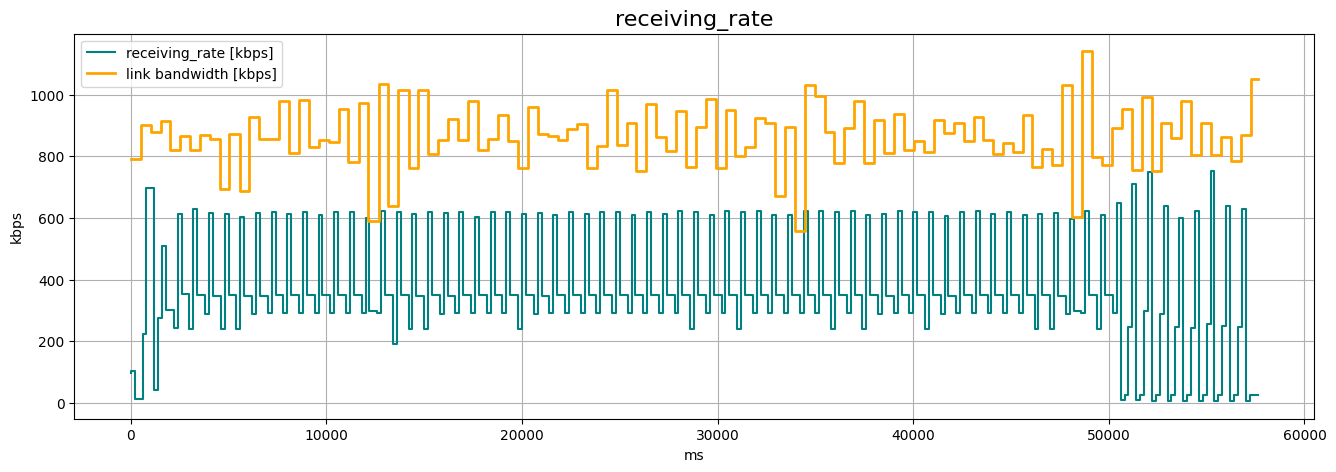

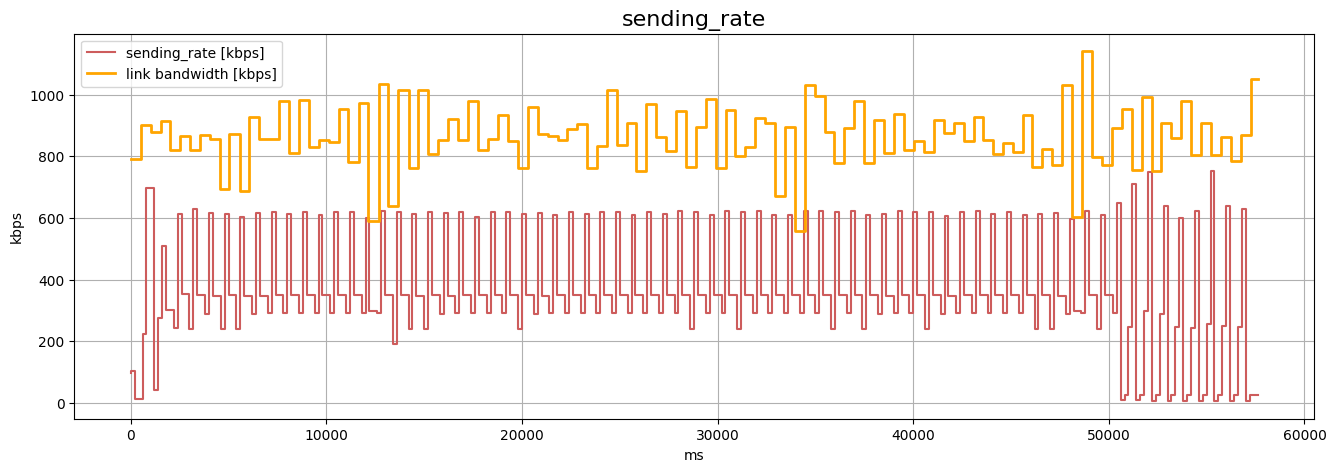

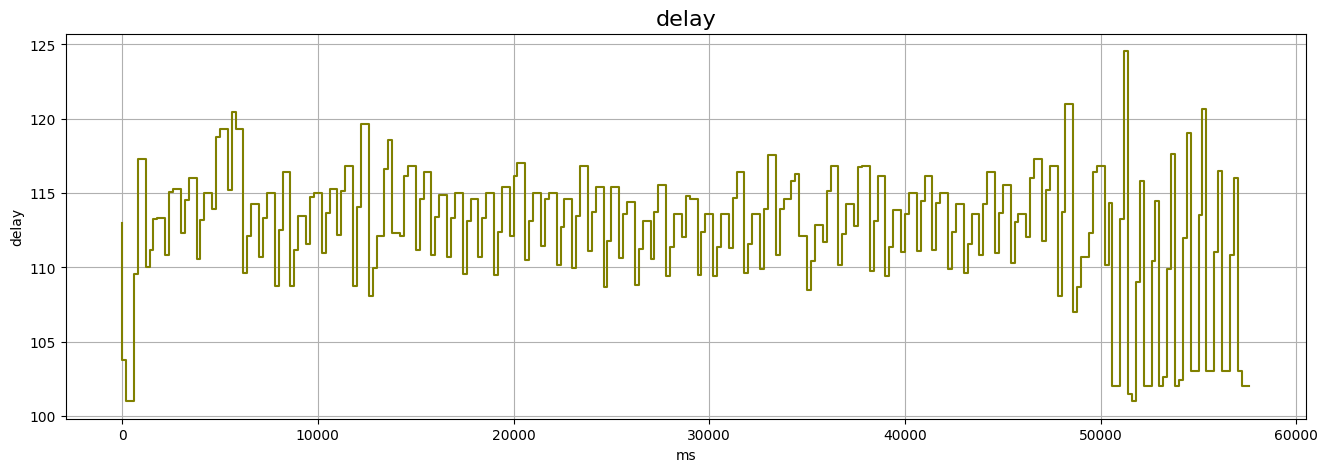

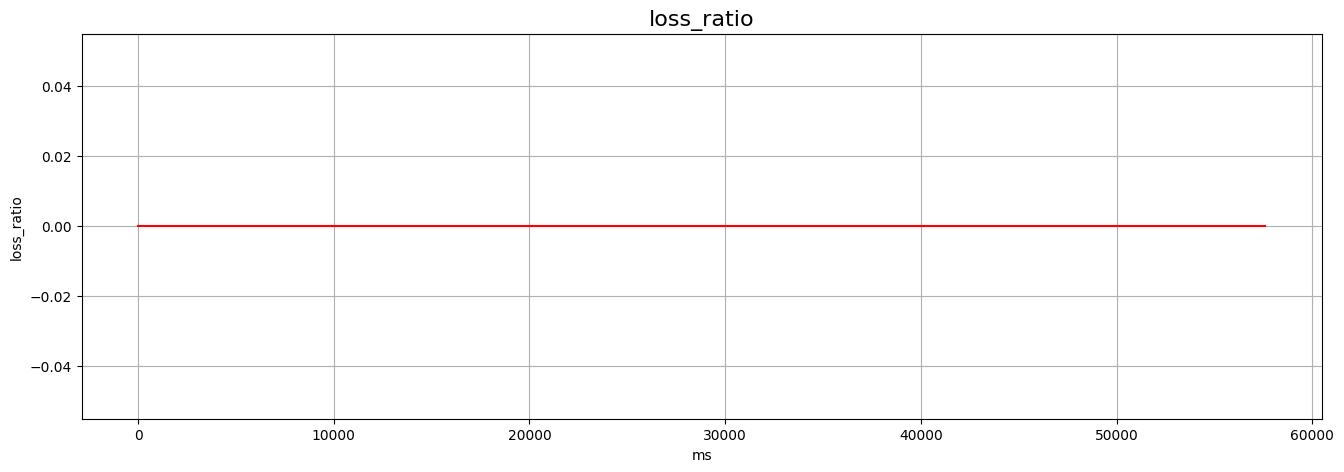

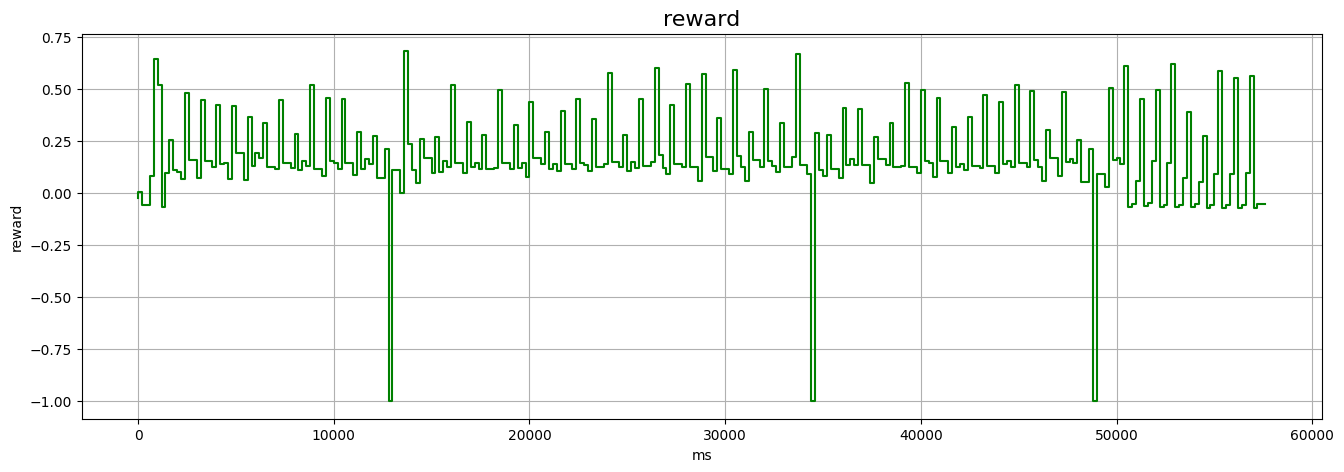

In [10]:
colors = iter(["dodgerblue", "teal", "indianred", "olive", "red", "green"])

for metric in ["bandwidth_prediction", "receiving_rate", "sending_rate", "delay", "loss_ratio", "reward"]:

    #Define capacity
    trace_name = l_rate["trace"]
    print(trace_name)
    trace_name = "../" + trace_name.split("/")[1] + "/" + trace_name.split("/")[2]

    with open(trace_name, "r") as f:
        d = json.load(f)

    df = pd.DataFrame(d["uplink"]["trace_pattern"])
    time = [0] + list(df["duration"].cumsum())
    capacities = [df["capacity"].iloc[0]] + list(df["capacity"])    

    df_rate = pd.DataFrame(l_rate[metric], columns=[metric])

    t = np.arange(len(df_rate))*time_step
    df_rate["time"] = t
    df_rate.set_index("time", inplace=True)

    if metric in ["bandwidth_prediction", "sending_rate", "receiving_rate"]:

        plt.figure(figsize=(16,5))
        plt.title(metric, fontsize=16)
        plt.step(df_rate.index, df_rate[metric]/1000, label=f"{metric} [kbps]", color=next(colors))
        plt.step(time, capacities, lw=2, label="link bandwidth [kbps]", color="orange")
        plt.legend()
        plt.ylabel("kbps")
        plt.xlabel("ms")
        plt.grid()
#             plt.ylim(0,10000)

    else:
        plt.figure(figsize=(16,5))
        plt.title(metric, fontsize=16)
        plt.step(df_rate.index, df_rate[metric], label=f"{metric}", color=next(colors))
        plt.ylabel(metric)
        plt.xlabel("ms")
        plt.grid()